In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

## Modelo con dos clases y dos variables

X (100, 2)
y (100,)


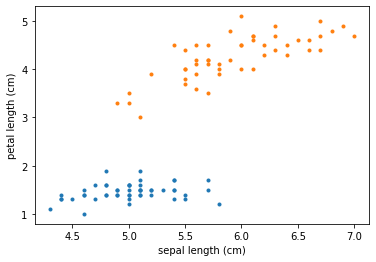

In [2]:
# Filtrar los datos para tener sólo dos clases y dos variables
iris = load_iris()
idx = np.logical_or(iris.target==0,iris.target==1)

y = iris.target[idx]
X = iris.data[idx,:]
X = X[:,[0,2]]
feature_names = [iris.feature_names[0],iris.feature_names[2]]

print('X',X.shape)
print('y',y.shape)

plt.plot(X[y==0,0],X[y==0,1],'.')
plt.plot(X[y==1,0],X[y==1,1],'.')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

In [3]:
model = LogisticRegression()
model.fit(X,y)
w0 = model.intercept_[0]
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
print(model.coef_)
print(model.intercept_)
print('w0',w0)
print('w1',w1)
print('w2',w2)

# Modelo =    0.36*x1 + 2.84*x2 - 9.64

[[0.3653486  2.84071409]]
[-9.64260838]
w0 -9.642608384818239
w1 0.36534860074191366
w2 2.8407140938691704


#### Para pintar el modelo en la gráfica
$$ w_0 + x_1 w_1 + x_2 w_2 = 0  $$
$$ x_2 = m x_1 + b $$

Despejando
$$ w_0 + x_1 w_1 + x_2 w_2 = 0  $$
$$ x_2 w_2 = - w_0 - x_1 w_1  $$
$$ x_2 = - \frac{w_0}{w_2} - x_1 \frac{w_1}{w_2}  $$


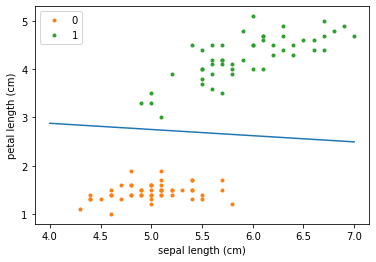

In [4]:
x1 = np.array([4.0,7.0])
x2 = -(w0/w2) - x1*(w1/w2)
plt.plot(x1,x2)
plt.plot(X[y==0,0],X[y==0,1],'.',label='0')
plt.plot(X[y==1,0],X[y==1,1],'.',label='1')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

In [5]:
newsample_class0 = [[4.6,2.4],[5.7,1.2]]
newsample_class1 = [[4.6,6.4],[5.7,7.2]]
newsample = [[5.0,2.8]]
y_pred = model.predict(newsample)
prob = model.predict_proba(newsample)
print(y_pred)
print(prob)

# Modelo =    0.36*x1 + 2.84*x2 - 9.64
print( w0 + 4.6*w1 + 2.4*w2)
print( w0 + 4.6*w1 + 6.4*w2)

[1]
[[0.46552129 0.53447871]]
-1.1442909961194276
10.218565379357255


## Modelo no lineal

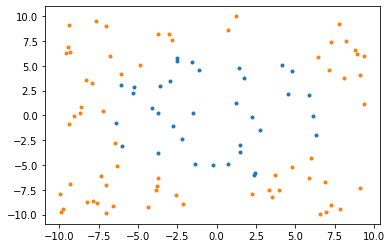

In [11]:
X = np.random.uniform(-10,10,(100,2))
y = np.zeros((100))

r = np.sqrt(X[:,0]**2 + X[:,1]**2)
y[r>7] = 1

plt.figure()
plt.plot(X[y==0,0],X[y==0,1],'.')
plt.plot(X[y==1,0],X[y==1,1],'.')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X,y)
y_ = model.predict(X)
## Accuracy
acc = 0
for i in range(len(y)):
    if y[i]==y_[i]:
        acc += 1
acc = acc / len(y)
print('accuracy',acc)
print('accuracy_score',accuracy_score(y,y_))

accuracy 0.64
accuracy_score 0.64


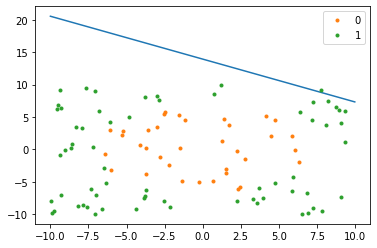

In [18]:
w0 = model.intercept_[0]
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
x1 = np.array([-10.0,10.0])
x2 = -(w0/w2) - x1*(w1/w2)
plt.plot(x1,x2)
plt.plot(X[y==0,0],X[y==0,1],'.',label='0')
plt.plot(X[y==1,0],X[y==1,1],'.',label='1')
plt.legend()
plt.show()

### Agregamos variables

In [26]:
XX = np.concatenate(( X, X**2,X**3 ),axis=1)
model = LogisticRegression()
model.fit(XX,y)
y_ = model.predict(XX)
print('accuracy',accuracy_score(y,y_))
print('coef',model.coef_)

accuracy 1.0
coef [[ 0.04087418 -0.16847184  0.87844039  0.98695157 -0.00410747  0.0046082 ]]


# Clasificación de n clases y n variables

In [28]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
print('feature_names',feature_names)
print('X',X)
print('y',y)

feature_names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.

In [30]:
model = LogisticRegression()
model.fit(X,y)
y_ = model.predict(X)
print('accuracy',accuracy_score(y,y_))

accuracy 0.9733333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
XX = np.concatenate( (X,X**2,X**3),axis=1 )
model.fit(XX,y)
y_ = model.predict(XX)
print('accuracy',accuracy_score(y,y_))

accuracy 0.9866666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
